In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [50]:
raw_data = pd.read_csv('European_Ski_Resorts.csv')
m = np.max(np.array(raw_data.iloc[:,5])+1)
ticket_prices = (np.array(raw_data.iloc[:,5])).tolist()


In [51]:
def fix_data(data):
    n, m = data.shape

    for i in range(n):
        if data.iloc[i,10] == 'No' : data.iloc[i,10] = 0
        else : data.iloc[i,10] = 1

    for i in range(n):
        if data.iloc[i,11] == 'No' : data.iloc[i,11] = 0
        else : data.iloc[i,11] = 1

    countries = []

    for i in range(n):
        if data.iloc[i,2] not in countries : countries.append(data.iloc[i,2])

    indexes = []
    for i in range(len(countries)):
        indexes.append(i)

    countries_dic = {}
    for key in countries:
        for value in indexes:
            countries_dic[key] = value
            indexes.remove(value)
            break

    for i in range(n):
        data.iloc[i,2] = countries_dic[data.iloc[i,2]]
    data = data.drop(columns='DayPassPriceAdult')
    return data.iloc[:,2:]

data = fix_data(raw_data)


In [52]:
Caracteristics = []

for i in range(data.shape[0]):
    Caracteristics.append(tuple(data.iloc[i,:]))


In [53]:
nodes = len(data.iloc[4,:])
entryLayer = tf.keras.layers.Dense(units=nodes, input_shape=[nodes])
hiddenLayer  = tf.keras.layers.Dense(units=nodes)
outputLayer  = tf.keras.layers.Dense(units=1)

In [54]:
My_model = tf.keras.Sequential([entryLayer, hiddenLayer, outputLayer])

In [96]:
My_model.compile(
    optimizer = tf.keras.optimizers.Adam(0.08),
    loss = 'mean_squared_error'
)

In [97]:
Epochs = My_model.fit(Caracteristics, ticket_prices, epochs=600, verbose=0)

117.26539611816406


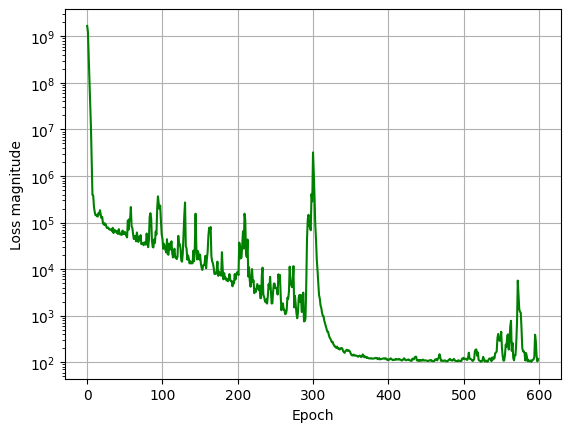

In [98]:
plt.xlabel('Epoch')
plt.ylabel('Loss magnitude')
plt.plot(Epochs.history['loss'], color='green')
plt.grid()
plt.yscale('log')
print(Epochs.history['loss'][599])
plt.show()

In [99]:
print(ticket_prices[347])
print(My_model.predict([Caracteristics[347]]))
print(ticket_prices[237])
print(My_model.predict([Caracteristics[237]]))
print(ticket_prices[56])
print(My_model.predict([Caracteristics[56]]))
print(ticket_prices[125])
print(My_model.predict([Caracteristics[125]]))

49
1/1 [==============================] - 0s 138ms/step
[[40.139805]]
25
1/1 [==============================] - 0s 92ms/step
[[32.522724]]
51
1/1 [==============================] - 0s 78ms/step
[[39.872555]]
39
1/1 [==============================] - 0s 88ms/step
[[33.10033]]
